<div style="text-align:center;"><h1>AlexNet教學筆記</h1></div>




<h2>§AlexNet歷史摘要</h2>

---

 <img src='img/History_Brief.png'>


<ul>
<li style = font-size:16px;>2012的ImageNet競賽獲得冠軍並比起2011年大幅的降低錯誤率，是第一個勝出CNN模型</li>
<br />
<li style = font-size:16px;>2013的ZFNet只是調整AlexNet的超參數</li>
<br />
<li style = font-size:16px;>Dropout、Relu、GPU造成歷史性的突破</li>
</ul>



<h2>§AlexNet模型架構</h2>

---


<img src='img/AlexNet_Structure.png'>

<img src='img/AlexNet_Structure2.png'>

<ul>
<li style = font-size:16px;>$224\times224經由W_{Out}(i)=1+\frac{W_{in}(i)-R+2P}{S}計算得不出下一層的55，
疑似先經過padding成227\times227$</li>
<br />
<li style = font-size:16px;>大張的filter跟Norm Layer 後面都不常出現了</li>
<br />
<li style = font-size:16px;>採用2個GPU平行運算，因當時只有GTX580可用</li>
<br />
</ul>


 <h3>參數量計算小練習：</h3>
 <img src='img/Parameters_Formaula.png'>

In [6]:
print('Conv1:(11*11*3+1)*96 ={0}\n'.format((11*11*3+1)*96)) 

print('Conv2:(5*5*48+1)*128*2 ={0}\n'.format((5*5*48+1)*128*2)
print('Conv3:(3*3*256+1)*384 ={0}\n'.format((3*3*256+1)*384))
print('Conv4:(3*3*384+1)*384 ={0}\n'.format((3*3*384+1)*384))
print('Conv5:(3*3*384+1)*256 ={0}\n'.format((3*3*384+1)*256))

print('Conv2:(5*5*96+1)*256 ={0}\n'.format((5*5*96+1)*256))
print('Conv3:(3*3*256+1)*384 ={0}\n'.format((3*3*256+1)*384))
print('Conv4:(3*3*384+1)*384 ={0}\n'.format((3*3*384+1)*384))
print('Conv5:(3*3*384+1)*256 ={0}\n'.format((3*3*384+1)*256))

Conv1:(11*11*3+1)*96 =34944

Conv2:(5*5*96+1)*256 =614656

Conv3:(3*3*256+1)*384 =885120

Conv4:(3*3*384+1)*384 =1327488

Conv5:(3*3*384+1)*256 =884992



<h3>小張的filter比較優：</h3>
<img src='img/SmallFilter_Explain.png'>
<img src="img/SmallFilter_Explain2.png">


<h3>CNN性質複習：</h3>

<h2>§Data Augmentation</h2>

---

<h3>圖片轉換與翻轉：</h3>
<img src='img/Data_Augmentation1.png'>

<h3>PCA顏色資料增強法：</h3>
<img src='img/Data_Augmentation2_1.png'>
<img src='img/Data_Augmentation2_2.png'>

<img src='img/FancyPCA.png'>

(224, 224, 3)
uint8
(50176, 3)
cov: 
[[1.00002816 0.93360931 0.73711198]
 [0.93360931 0.99999322 0.91288213]
 [0.73711198 0.91288213 1.00005678]]
lambdas: 
[[2.72529893]
 [0.26344254]
 [0.0113367 ]]
p: 
[[-0.56636936 -0.68450155  0.45900259]
 [-0.60346694 -0.03486899 -0.79662526]
 [-0.56129618  0.72817703  0.39332533]]
alphas*lambdas: 
[[0.3458791 ]
 [0.02165667]
 [0.00261667]]


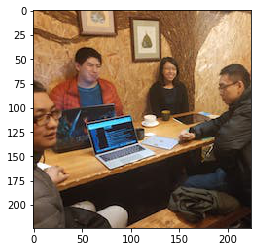

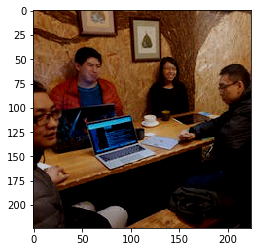

In [114]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
img_ex = mpimg.imread('img/Pytorch_Taichung_D1.jpg','rb')
img_ex = img_ex[:224,:224,:]#切成224*224
print(img_ex.shape)
plt.figure()
plt.imshow(img_ex)
print(img_ex.dtype)
renorm_image = np.reshape(img_ex, (img_ex.shape[0]*img_ex.shape[1],3))
print(renorm_image.shape)
renorm_image = renorm_image.astype('float32')
renorm_image -= np.mean(renorm_image, axis=0)
renorm_image /= np.std(renorm_image, axis=0)
cov = np.cov(renorm_image, rowvar=False)
print('cov: \n{0}'.format(cov))
lambdas, p = np.linalg.eig(cov)
lambdas = lambdas.reshape(3,1)
print('lambdas: \n{0}'.format(lambdas))
print('p: \n{0}'.format(p))
#print(np.dot(p[:,1],p[:,0])) #orthonormal
alphas = np.random.normal(0, 0.1, 3).reshape(3,1)
#delta = p[:,0]*alphas[0]*lambdas[0] + p[:,1]*alphas[1]*lambdas[1] + p[:,2]*alphas[2]*lambdas[2]
print('alphas*lambdas: \n{0}'.format(alphas*lambdas))
delta = np.dot(p, alphas*lambdas)
#delta = alphas #一般擾亂
delta = (delta*255.).astype('int8')
pca_color_image = np.maximum(np.minimum(img_ex + delta.transpose(), 255), 0).astype('uint8')
plt.figure()
plt.imshow(pca_color_image)


<h3>直覺：</h3>
<img src='img/ColorPCA_Explain.png'>

[詳情傳送門](https://stats.stackexchange.com/questions/251892/implementing-fancy-pca-augmentaiton)

<h2>§Local Response Normalization</h2>

---


<img src='img/Local_Response_Normalization.png'>

施工中...

<h2>§Dropout</h2>

---

<h3>訓練期加上dropout mask：</h3>
<img src='img/Dropout_Mask.png'>
<h3>像是Bagging：</h3>
<img src='img/Dropout1.png' >

<ul>
<li style = font-size:16px;>在bagging中，所有的分類器都是獨立的，而在dropout中，所有的模型都是共享參數的</li>
<br />
<li style = font-size:16px;>在bagging中，所有的分類器都是在特定的數據集下訓練至收斂，而在dropout中沒有
    明確的模型訓練過程。網絡都是在一步中訓練一次（輸入一個樣本，隨機訓練一個子網絡）</li>
<br />
<li style = font-size:16px;>Dropout 比較適合在大型的網路用</li>
<br />
<li style = font-size:16px;>在線性迴歸中dropout相當於L2 norm</li>
<br />
<li style = font-size:16px;>並沒有精準的理論可以確定經過深層次網絡最後乘回來是一個正確的ensamble predictor，但實務上效果非常  好，而且也能證明很多非線性轉換也適用</li>
<br />
<li style = font-size:16px;>Dropout mask 不一定要uniform分佈，均值也不一定要是0，有一招是用均值1的Ｎormal distribution，發現可以outperform，因為不用碰到weight scaling的問題</li>
<br />
</ul>


<h3>為什麼會有用？</h3>
<img src='img/Dropout_CoAdaption.png' >

<ul>
<li style = font-size:16px;>傳統加入noise的方法是沒有結構的，dropout丟掉的一個hidden unit可能是一個可以辨認鼻子的hi，強迫其他h學習萃取重複的特徵</li>
</ul>

<h3>測試期要乘回來：</h3>
<img src='img/Dropout_Testp.png' >
<img src='img/Dropout_Testp2.png' >

<h2>§激活函數</h2>

---

 <h3>Relu的優缺點：</h3>
 <img src='img/Relu_ProsCons.png'>
 <h3>LeNet用的tanh優缺點：</h3>
 <img src='img/Tanh_ProsCons.png'>

<h3>Softmax：</h3>

$$S_i=\frac {e^{a_j}} {\sum_k{e^a_k}}$$

<ul>
<li style = font-size:16px;>Soft指平滑連續可微的性質,max指argmax</li>
<br />
<li style = font-size:16px;>搭配log形式的loss function可以推導出很直覺的式子(h-y)，所以不會saturate</li>
<br />
<li style = font-size:16px;>但若不配合log單獨使用時，exp次方負很大造成梯度消失，或是輸出層差異太大也會造成飽和</li>
<br />
</ul>

<h3>SoftMax梯度推導：</h3>
<img src='img/SoftMax1_3.png'>
<img src='img/SoftMax4.png'>

<h2>§Optimization Method</h2>

---

<img src='img/OptimizationMethod.png'>
<img src='img/WeightDecay.png'>
<img src='img/Momentum.png'>

<h2>§實作</h2>

---


images.size = torch.Size([4, 3, 32, 32])

labels = tensor([6, 8, 7, 8])


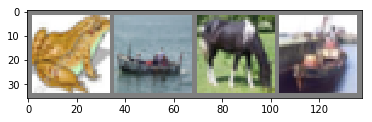

 frog  ship horse  ship


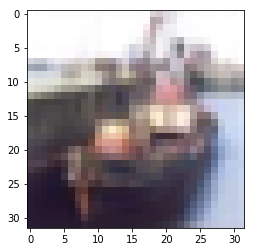

In [92]:
'''
Reference：
https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py
'''
import os
import torch
import torch.utils.data as torch_data
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F


DOWN_LOAD = False

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].


transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=DOWN_LOAD, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=DOWN_LOAD, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    #print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('images.size = {0}\n'.format(images.size()))  #[nSamples, nChannels, Height, Width]
print('labels = {0}'.format(labels))

# show images
imshow(torchvision.utils.make_grid(images))#加上網格把圖片橫向整併
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
imshow(images[3])#只看一張圖片

In [103]:
 
cnn = CNN()
print(cnn)  # net architecture

optimizer = optim.SGD(cnn.parameters(), lr=0.001,  momentum=0.9)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

torch.load('cnn.pkl')
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for step, (batch_x, batch_y) in enumerate(trainloader, 1):
        # zero the parameter gradients
        optimizer.zero_grad()
    
        # forward + backward + optimize
        batch_y_pred = cnn(batch_x)
        loss = loss_func(batch_y_pred, batch_y)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if step % 2000 == 0:    
            print('[epoch:%d, step:%5d] loss: %.6f' %
                  (epoch + 1, step, running_loss/2000))
        running_loss = 0.0

print('Finished Training')
torch.save(cnn,'cnn.pkl')
########################################################################



CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[epoch:1, step: 2000] loss: 0.000857
[epoch:1, step: 4000] loss: 0.000743
[epoch:1, step: 6000] loss: 0.001009
[epoch:1, step: 8000] loss: 0.001008
[epoch:1, step:10000] loss: 0.000890
[epoch:1, step:12000] loss: 0.000523
[epoch:2, step: 2000] loss: 0.000468
[epoch:2, step: 4000] loss: 0.001304
[epoch:2, step: 6000] loss: 0.000964
[epoch:2, step: 8000] loss: 0.000540
[epoch:2, step:10000] loss: 0.000239
[epoch:2, step:12000] loss: 0.001040
Finished Training


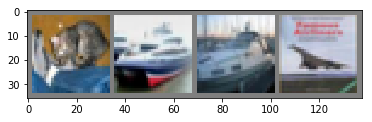

('GroundTruth: ', '  cat  ship  ship plane')
('Predicted: ', '  cat   car   car  ship')
Accuracy of the network on the 10000 test images: 54 %


In [96]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = cnn(images)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

